# Code Walkthrough of Keras RandomForestModel on Kaggle

<span style="font-size:large">The Ensemble Learning method</span> trains a group of Decision Trees to make *predicitions* in a way that emulates *the wisdom of the crowd*. Despite its intuitive simplicity, **Random Forest** is one of the most powerful Machine Learning algorithms today. A new implementation by *TensorFlow* brings this method to *neural networks*.

![](https://1.bp.blogspot.com/-Ax59WK4DE8w/YK6o9bt_9jI/AAAAAAAAEQA/9KbBf9cdL6kOFkJnU39aUn4m8ydThPenwCLcBGAsYHQ/s0/Random%2BForest%2B03.gif)
[https://blog.tensorflow.org/2021/05/introducing-tensorflow-decision-forests.html](https://blog.tensorflow.org/2021/05/introducing-tensorflow-decision-forests.html)

## Let's get started
In this *kernel* I'm going to walk you through how to install and train a **RandomForestModel**, one of the new models in TensorFlow Decision Forests. Let's start our Kaggle session, import the dataset and have a look at it.


In [ ]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
# import and display dataset
df = pd.read_csv('/kaggle/input/carsdata/cars.csv')
df.head()

## Analyzing your data

This was supposed to be *very easy*, however, when converting the data from *Pandas* to *Keras* format, *Python* threw an error: `The label "brand" is not a column of the dataframe.` Clearly, "brand" *is* one of the column labels. So what's wrong? If you examine the header values, you'll see that most have *leading white space*. This has to be cleaned up.

In [ ]:
# column header values
display(list(df.columns.values))

The *key takeaway* is that while it is impossible to predict what kind of issues you'll run into, there are plenty of code examples online, for instance [Stack Overflow](https://stackoverflow.com). This will help you construct a workaround.

In [ ]:
# strip leading spaces from column names
df.columns = df.columns.str.lstrip(' ')

## Feature selection
Your model will successfully learn if the training data contains enough *relevant features* and not too many *irrelevant* ones. For my own take on this dataset, I reasoned that the *weight* of the vehicle, and it's *accelleration* were probably *negatively or positively correlated* to other features in the table. Those columns can be dropped.

I thought that *year* might help identify US, Japanese, or European brands, the object of this dataset challenge.

In [ ]:
# drop columns
columns = ['weightlbs','time-to-60']
df.drop(columns, axis=1, inplace=True)
df.head()

## Splitting the data into Training and Test sets

This is where TensorFlow differs from what you might be used to on Kaggle. Scikit-learn model selection provides **train_test_split** to split data into random *train* and *test* subsets, with *X* and *y* data. TensorFlow Decision Forests does not require separate *X* and *y* data.

The following routine splits the data into training and test sets. You'll see how these are used soon.

In [ ]:
# split the dataset into Training and Test sets

def split_dataset(dataset, ratio=0.25) :
    indices = np.random.rand(len(dataset)) < ratio
    return dataset[~indices], dataset[indices]

train_ds, test_ds = split_dataset(df)
print('{} samples for training, {} samples for test.'
      .format(len(train_ds),len(test_ds)))

## Install and import TensorFlow Decision Forrests

This is the point where I squeeze the new capability onto Kaggle. Scroll past all this output to continue.

In [ ]:
# install TensorFlow Decision Forests
!pip install tensorflow_decision_forests

In [ ]:
import tensorflow_decision_forests as tfdf

# Convert Pandas to TensorFlow

Keras provides **pd_dataframe_to_tf_dataset** to prepare data for their Machine Learning model. Specify your dataset, and notice that you provide a target *column vector* by designating **label**. In our case, we do not break-out "brand" into separate *y data*.

In [ ]:
# convert Pandas dataframe to Tensorflow Training set
train = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds, label="brand")

# Setup and train the model

It really is just two lines of code.

In [ ]:
# train the model
model = tfdf.keras.RandomForestModel()
model.fit(train)

# How well does the model do?

Running the test set against the model requires the same conversion we did for training. There is an extra step here to **compile** the model for what you want it do, which is common for *neural networks*.

Keras is actually a *Deep Learning* platform, and the TensorFlow team says that the Decision Forest library can serve as a *bridge* to the TensorFlow ecosystem.

In [ ]:
# convert Pandas dataframe to Tensorflow Test set
test = tfdf.keras.pd_dataframe_to_tf_dataset(test_ds, label="brand")

# evaluate the model
model.compile(metrics=["accuracy"])

evaluation = model.evaluate(test, return_dict=True)
print()

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

# Your milage may vary

I can get approximately 80% accuracy using this technique on this particular dataset, depending on how I split *training* and *test* sets. All that without setting any *hyperparameters*.

In Machine Learning, a *hyperparameter* tells the model what to do, and a *parameter* is a value *inside* the model, as it learns. The **ratio** argument in the **split_dataset** routine *above* is a kind of *hyperparameter* that you can adjust, to play with how much data you want for *training* and how much for *testing*.

Below, we run **predict** against the *test* set to see how well the model classifies. The Random Forest outputs three data points, one of them indicating the "brand" prediction. The first item is shown. 

In [ ]:
classifications = model.predict(test)
print(f'Predict first item\n{classifications[0]}\n')

test_ds.head(1)

## Tools for analyzing the model

#### Model inspector

The **variable_importances** on the model inspector calculates the importance of each feature. We can see the model favored *cylinders*, *cubicinches*, and *mpg*.

In [ ]:
model.make_inspector().variable_importances()

#### Model plotter

*Google Colab* has a model plotter that allows you to *interpret* tree structure (shown in the image below).

After considering *horsepower*, the model branches to *engine size (cubic inches)* and quickly decides the case for US cars <span style="color:green;">solid green</span>. Over in the fourth column, we see that *year* helped decide the case between European <span style="color:blue;">blue</span> and Japanese cars <span style="color:red;">red</span>.

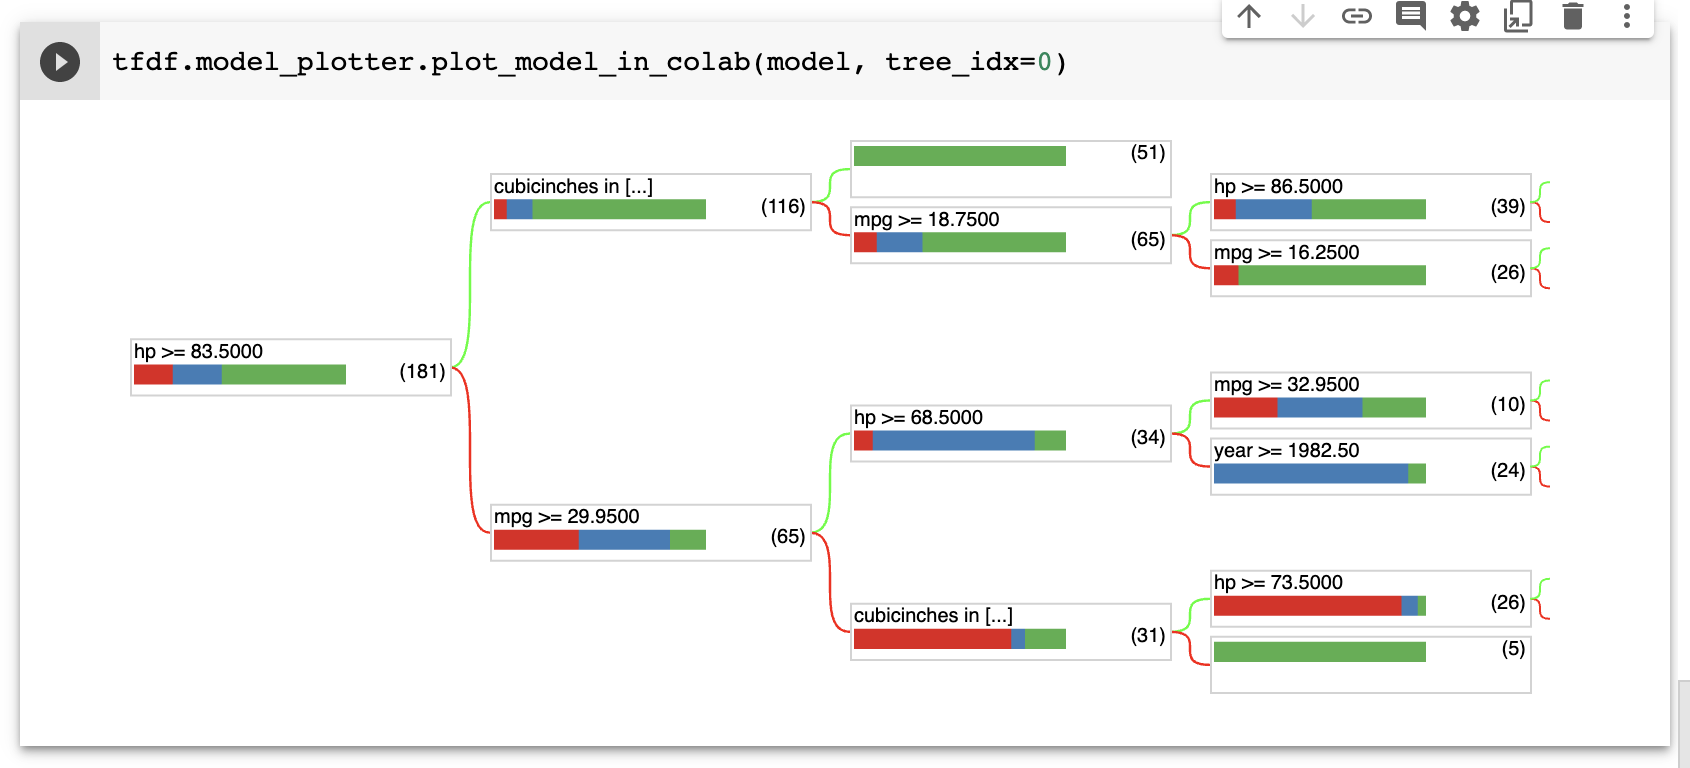

#### Conclusion

What this seems to say is that the *model inspector* did not calculate *year* to be very important, nonetheless it was not a bad idea to include it in the model, as seen in the *model plotter* .

I never yet encountered an AI that had any common sense.

## What do you think?

Machine Learning enthusiasts will be interested to know that *TensorFlow Decision Forests* does not currently run on *Mac* or *Windows*. But, hey, you can try it on Kaggle!

If you got this far and learned something, or at least had a chuckle, be sure to upvote this notebook.